In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# loading data
data = np.loadtxt('data2.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')

(100, 3)


In [3]:
# data normalization
data_ori = data.copy()
maximum = np.max(data[:, :num_feature],axis=0,keepdims=True)
minimun = np.min(data[:, :num_feature],axis=0,keepdims=True)
data[:, :num_feature] = (data[:, :num_feature] - minimun)/(maximum - minimun)
print(data)


[[0.06542785 0.6946549  0.        ]
 [0.00326632 0.19470452 0.        ]
 [0.08296783 0.61961776 0.        ]
 [0.43176425 0.81600136 1.        ]
 [0.7019434  0.6553921  1.        ]
 [0.21534562 0.37665957 0.        ]
 [0.44500887 0.9654586  1.        ]
 [0.6444968  0.23365523 1.        ]
 [0.65989107 0.83229077 1.        ]
 [0.7793429  0.18940757 1.        ]
 [0.943151   0.11165139 0.        ]
 [0.6443379  0.         0.        ]
 [0.7488742  0.67205614 1.        ]
 [0.56336975 0.9831432  1.        ]
 [0.13586995 0.6655353  0.        ]
 [0.3427341  0.8584645  1.        ]
 [0.5591495  0.32427782 1.        ]
 [0.5430494  0.23547986 0.        ]
 [0.58195853 0.912954   1.        ]
 [0.67250407 0.24862531 1.        ]
 [0.53481036 0.1792275  0.        ]
 [0.85450447 0.5155716  1.        ]
 [0.29348215 0.26737323 0.        ]
 [0.05952842 0.19931197 0.        ]
 [0.6860532  0.56205136 1.        ]
 [0.46169755 0.5764377  1.        ]
 [0.71853304 0.20827833 1.        ]
 [0.9037758  0.12008007 0.  

In [4]:
# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2].reshape(-1,1)
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2].reshape(-1,1)

In [5]:
# model init
w = np.zeros((num_feature+1,1))



iterations = 10000
lr = 0.1
lam = 0.0005

def cross_entropy_loss(y_pred,y,w,lam):
    return -np.mean(np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))+lam*np.linalg.norm(w, axis=1, keepdims=True))*2

# (w[0]**2+w[1]**2+w[2]**2)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
log = []
# gradient descent
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))
    g = lr*np.mean((y_pred-y_train)*X_train, axis=0).reshape(-1,1)+2*lam*w

    w -= g
    loss = cross_entropy_loss(y_pred,y_train,w,lam)
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])
    #y_pred_test = sigmoid(np.matmul(X_test, w))
    #loss = cross_entropy_loss(y_pred_test,y_test)
#     print('iter:{},val_loss:{}'.format(i,loss))


iter:0,loss:1.386285210472921
iter:1,loss:1.3809597037711383
iter:2,loss:1.3759326698422967
iter:3,loss:1.3711812245720834
iter:4,loss:1.3666842381693929
iter:5,loss:1.3624222096691598
iter:6,loss:1.3583771484853597
iter:7,loss:1.3545324630044593
iter:8,loss:1.350872856116611
iter:9,loss:1.3473842275105925
iter:10,loss:1.3440535825052997
iter:11,loss:1.3408689471524184
iter:12,loss:1.3378192893190344
iter:13,loss:1.334894445442987
iter:14,loss:1.3320850526458166
iter:15,loss:1.3293824858865004
iter:16,loss:1.3267787998423817
iter:17,loss:1.324266675210662
iter:18,loss:1.3218393691335493
iter:19,loss:1.3194906694618542
iter:20,loss:1.3172148525848975
iter:21,loss:1.3150066445684947
iter:22,loss:1.3128611853571137
iter:23,loss:1.3107739958107987
iter:24,loss:1.3087409473617748
iter:25,loss:1.3067582340897232
iter:26,loss:1.3048223470283047
iter:27,loss:1.3029300505286034
iter:28,loss:1.301078360517626
iter:29,loss:1.2992645245018197
iter:30,loss:1.2974860031767566
iter:31,loss:1.29574045

iter:285,loss:1.050131182992266
iter:286,loss:1.049505726096678
iter:287,loss:1.0488820781444173
iter:288,loss:1.0482602327390298
iter:289,loss:1.047640183510417
iter:290,loss:1.047021924114717
iter:291,loss:1.046405448234191
iter:292,loss:1.045790749577108
iter:293,loss:1.0451778218776306
iter:294,loss:1.0445666588956963
iter:295,loss:1.0439572544169087
iter:296,loss:1.0433496022524218
iter:297,loss:1.0427436962388266
iter:298,loss:1.0421395302380392
iter:299,loss:1.0415370981371905
iter:300,loss:1.040936393848512
iter:301,loss:1.0403374113092292
iter:302,loss:1.0397401444814447
iter:303,loss:1.039144587352035
iter:304,loss:1.0385507339325377
iter:305,loss:1.0379585782590421
iter:306,loss:1.0373681143920828
iter:307,loss:1.03677933641653
iter:308,loss:1.0361922384414848
iter:309,loss:1.0356068146001673
iter:310,loss:1.0350230590498155
iter:311,loss:1.0344409659715736
iter:312,loss:1.0338605295703929
iter:313,loss:1.0332817440749207
iter:314,loss:1.0327046037373995
iter:315,loss:1.0321

iter:573,loss:0.9254262169789024
iter:574,loss:0.9251352764919606
iter:575,loss:0.9248450477537977
iter:576,loss:0.9245555286709731
iter:577,loss:0.9242667171575185
iter:578,loss:0.9239786111349074
iter:579,loss:0.9236912085320231
iter:580,loss:0.9234045072851305
iter:581,loss:0.9231185053378418
iter:582,loss:0.9228332006410865
iter:583,loss:0.9225485911530837
iter:584,loss:0.9222646748393079
iter:585,loss:0.9219814496724607
iter:586,loss:0.9216989136324404
iter:587,loss:0.9214170647063117
iter:588,loss:0.9211359008882763
iter:589,loss:0.920855420179643
iter:590,loss:0.9205756205887973
iter:591,loss:0.9202965001311734
iter:592,loss:0.9200180568292241
iter:593,loss:0.9197402887123912
iter:594,loss:0.919463193817077
iter:595,loss:0.919186770186616
iter:596,loss:0.9189110158712447
iter:597,loss:0.9186359289280732
iter:598,loss:0.918361507421059
iter:599,loss:0.9180877494209753
iter:600,loss:0.917814653005384
iter:601,loss:0.9175422162586094
iter:602,loss:0.917270437271708
iter:603,loss:0.

iter:889,loss:0.8604149330658207
iter:890,loss:0.860273825259504
iter:891,loss:0.8601330216275467
iter:892,loss:0.8599925214194979
iter:893,loss:0.85985232388711
iter:894,loss:0.8597124282843334
iter:895,loss:0.8595728338673085
iter:896,loss:0.8594335398943568
iter:897,loss:0.8592945456259747
iter:898,loss:0.8591558503248243
iter:899,loss:0.8590174532557278
iter:900,loss:0.8588793536856579
iter:901,loss:0.8587415508837317
iter:902,loss:0.8586040441212023
iter:903,loss:0.8584668326714522
iter:904,loss:0.858329915809985
iter:905,loss:0.8581932928144177
iter:906,loss:0.8580569629644755
iter:907,loss:0.8579209255419817
iter:908,loss:0.8577851798308515
iter:909,loss:0.8576497251170859
iter:910,loss:0.8575145606887619
iter:911,loss:0.8573796858360273
iter:912,loss:0.8572450998510933
iter:913,loss:0.8571108020282261
iter:914,loss:0.8569767916637411
iter:915,loss:0.856843068055995
iter:916,loss:0.8567096305053788
iter:917,loss:0.8565764783143107
iter:918,loss:0.8564436107872297
iter:919,loss:0

iter:1215,loss:0.8270635291099664
iter:1216,loss:0.8269916157012039
iter:1217,loss:0.8269198455190286
iter:1218,loss:0.8268482182520583
iter:1219,loss:0.8267767335896843
iter:1220,loss:0.8267053912220689
iter:1221,loss:0.8266341908401418
iter:1222,loss:0.8265631321356001
iter:1223,loss:0.8264922148009038
iter:1224,loss:0.8264214385292759
iter:1225,loss:0.8263508030146977
iter:1226,loss:0.8262803079519084
iter:1227,loss:0.8262099530364018
iter:1228,loss:0.8261397379644251
iter:1229,loss:0.8260696624329763
iter:1230,loss:0.8259997261398011
iter:1231,loss:0.8259299287833922
iter:1232,loss:0.8258602700629862
iter:1233,loss:0.8257907496785618
iter:1234,loss:0.8257213673308375
iter:1235,loss:0.8256521227212689
iter:1236,loss:0.8255830155520482
iter:1237,loss:0.8255140455261
iter:1238,loss:0.8254452123470815
iter:1239,loss:0.8253765157193774
iter:1240,loss:0.8253079553481001
iter:1241,loss:0.8252395309390872
iter:1242,loss:0.8251712421988991
iter:1243,loss:0.8251030888348172
iter:1244,loss:0.

iter:1574,loss:0.8085046098382818
iter:1575,loss:0.8084687812184231
iter:1576,loss:0.8084330205388963
iter:1577,loss:0.8083973276641828
iter:1578,loss:0.8083617024590578
iter:1579,loss:0.8083261447885922
iter:1580,loss:0.8082906545181493
iter:1581,loss:0.8082552315133836
iter:1582,loss:0.8082198756402433
iter:1583,loss:0.8081845867649663
iter:1584,loss:0.8081493647540814
iter:1585,loss:0.8081142094744068
iter:1586,loss:0.8080791207930486
iter:1587,loss:0.8080440985774026
iter:1588,loss:0.808009142695151
iter:1589,loss:0.8079742530142635
iter:1590,loss:0.8079394294029947
iter:1591,loss:0.8079046717298856
iter:1592,loss:0.8078699798637611
iter:1593,loss:0.8078353536737306
iter:1594,loss:0.8078007930291861
iter:1595,loss:0.8077662977998026
iter:1596,loss:0.8077318678555366
iter:1597,loss:0.8076975030666257
iter:1598,loss:0.8076632033035889
iter:1599,loss:0.8076289684372231
iter:1600,loss:0.8075947983386064
iter:1601,loss:0.8075606928790936
iter:1602,loss:0.8075266519303183
iter:1603,loss:

iter:1831,loss:0.8011991689158012
iter:1832,loss:0.8011770540700546
iter:1833,loss:0.8011549803118264
iter:1834,loss:0.8011329475622034
iter:1835,loss:0.8011109557424322
iter:1836,loss:0.8010890047739198
iter:1837,loss:0.8010670945782343
iter:1838,loss:0.8010452250771021
iter:1839,loss:0.8010233961924108
iter:1840,loss:0.8010016078462057
iter:1841,loss:0.8009798599606918
iter:1842,loss:0.8009581524582314
iter:1843,loss:0.8009364852613462
iter:1844,loss:0.8009148582927138
iter:1845,loss:0.800893271475171
iter:1846,loss:0.8008717247317104
iter:1847,loss:0.8008502179854814
iter:1848,loss:0.8008287511597897
iter:1849,loss:0.8008073241780967
iter:1850,loss:0.8007859369640205
iter:1851,loss:0.8007645894413326
iter:1852,loss:0.8007432815339605
iter:1853,loss:0.8007220131659857
iter:1854,loss:0.8007007842616449
iter:1855,loss:0.8006795947453273
iter:1856,loss:0.8006584445415763
iter:1857,loss:0.8006373335750882
iter:1858,loss:0.8006162617707128
iter:1859,loss:0.8005952290534508
iter:1860,loss:

iter:2165,loss:0.7956833562609256
iter:2166,loss:0.7956714090481444
iter:2167,loss:0.7956594836829226
iter:2168,loss:0.7956475801245494
iter:2169,loss:0.7956356983323927
iter:2170,loss:0.7956238382658993
iter:2171,loss:0.7956119998845937
iter:2172,loss:0.7956001831480789
iter:2173,loss:0.7955883880160352
iter:2174,loss:0.7955766144482214
iter:2175,loss:0.7955648624044737
iter:2176,loss:0.7955531318447058
iter:2177,loss:0.7955414227289085
iter:2178,loss:0.7955297350171495
iter:2179,loss:0.7955180686695748
iter:2180,loss:0.7955064236464052
iter:2181,loss:0.7954947999079405
iter:2182,loss:0.7954831974145549
iter:2183,loss:0.7954716161266999
iter:2184,loss:0.7954600560049038
iter:2185,loss:0.7954485170097699
iter:2186,loss:0.7954369991019781
iter:2187,loss:0.7954255022422835
iter:2188,loss:0.7954140263915169
iter:2189,loss:0.7954025715105851
iter:2190,loss:0.7953911375604698
iter:2191,loss:0.7953797245022275
iter:2192,loss:0.7953683322969897
iter:2193,loss:0.7953569609059635
iter:2194,loss

iter:2435,loss:0.7931342600618052
iter:2436,loss:0.7931269570612239
iter:2437,loss:0.7931196673161476
iter:2438,loss:0.7931123908022318
iter:2439,loss:0.7931051274951787
iter:2440,loss:0.7930978773707347
iter:2441,loss:0.7930906404046931
iter:2442,loss:0.7930834165728912
iter:2443,loss:0.793076205851213
iter:2444,loss:0.793069008215587
iter:2445,loss:0.7930618236419873
iter:2446,loss:0.7930546521064331
iter:2447,loss:0.7930474935849884
iter:2448,loss:0.7930403480537619
iter:2449,loss:0.7930332154889079
iter:2450,loss:0.793026095866625
iter:2451,loss:0.7930189891631563
iter:2452,loss:0.7930118953547898
iter:2453,loss:0.7930048144178579
iter:2454,loss:0.7929977463287369
iter:2455,loss:0.7929906910638486
iter:2456,loss:0.792983648599658
iter:2457,loss:0.7929766189126747
iter:2458,loss:0.792969601979452
iter:2459,loss:0.7929625977765875
iter:2460,loss:0.7929556062807229
iter:2461,loss:0.7929486274685432
iter:2462,loss:0.7929416613167772
iter:2463,loss:0.7929347078021979
iter:2464,loss:0.79

iter:2784,loss:0.7912439097507526
iter:2785,loss:0.7912400283507051
iter:2786,loss:0.7912361539564259
iter:2787,loss:0.791232286555189
iter:2788,loss:0.7912284261342922
iter:2789,loss:0.7912245726810571
iter:2790,loss:0.7912207261828272
iter:2791,loss:0.7912168866269708
iter:2792,loss:0.791213054000878
iter:2793,loss:0.7912092282919635
iter:2794,loss:0.7912054094876645
iter:2795,loss:0.7912015975754411
iter:2796,loss:0.7911977925427763
iter:2797,loss:0.7911939943771773
iter:2798,loss:0.7911902030661726
iter:2799,loss:0.7911864185973148
iter:2800,loss:0.7911826409581787
iter:2801,loss:0.7911788701363629
iter:2802,loss:0.7911751061194875
iter:2803,loss:0.7911713488951969
iter:2804,loss:0.7911675984511563
iter:2805,loss:0.7911638547750549
iter:2806,loss:0.7911601178546048
iter:2807,loss:0.7911563876775395
iter:2808,loss:0.7911526642316157
iter:2809,loss:0.7911489475046128
iter:2810,loss:0.791145237484332
iter:2811,loss:0.7911415341585978
iter:2812,loss:0.7911378375152562
iter:2813,loss:0.

iter:3075,loss:0.7903644766155753
iter:3076,loss:0.7903621804901414
iter:3077,loss:0.7903598884982901
iter:3078,loss:0.7903576006325516
iter:3079,loss:0.7903553168854703
iter:3080,loss:0.7903530372496035
iter:3081,loss:0.790350761717522
iter:3082,loss:0.7903484902818105
iter:3083,loss:0.790346222935067
iter:3084,loss:0.790343959669903
iter:3085,loss:0.7903417004789436
iter:3086,loss:0.7903394453548271
iter:3087,loss:0.7903371942902057
iter:3088,loss:0.7903349472777439
iter:3089,loss:0.7903327043101207
iter:3090,loss:0.7903304653800278
iter:3091,loss:0.7903282304801703
iter:3092,loss:0.7903259996032669
iter:3093,loss:0.7903237727420488
iter:3094,loss:0.7903215498892613
iter:3095,loss:0.7903193310376624
iter:3096,loss:0.7903171161800232
iter:3097,loss:0.7903149053091285
iter:3098,loss:0.7903126984177758
iter:3099,loss:0.790310495498776
iter:3100,loss:0.7903082965449522
iter:3101,loss:0.7903061015491416
iter:3102,loss:0.790303910504194
iter:3103,loss:0.7903017234029724
iter:3104,loss:0.79

iter:3359,loss:0.7898535385958834
iter:3360,loss:0.7898521615846822
iter:3361,loss:0.7898507870486581
iter:3362,loss:0.7898494149833523
iter:3363,loss:0.7898480453843124
iter:3364,loss:0.7898466782470964
iter:3365,loss:0.7898453135672686
iter:3366,loss:0.7898439513404019
iter:3367,loss:0.7898425915620774
iter:3368,loss:0.7898412342278839
iter:3369,loss:0.7898398793334183
iter:3370,loss:0.7898385268742851
iter:3371,loss:0.7898371768460978
iter:3372,loss:0.7898358292444768
iter:3373,loss:0.7898344840650511
iter:3374,loss:0.7898331413034564
iter:3375,loss:0.789831800955338
iter:3376,loss:0.7898304630163481
iter:3377,loss:0.7898291274821467
iter:3378,loss:0.7898277943484023
iter:3379,loss:0.78982646361079
iter:3380,loss:0.7898251352649943
iter:3381,loss:0.7898238093067067
iter:3382,loss:0.7898224857316262
iter:3383,loss:0.7898211645354603
iter:3384,loss:0.7898198457139234
iter:3385,loss:0.7898185292627384
iter:3386,loss:0.7898172151776359
iter:3387,loss:0.7898159034543538
iter:3388,loss:0.

iter:3750,loss:0.7894665242584327
iter:3751,loss:0.7894658425041811
iter:3752,loss:0.7894651619739653
iter:3753,loss:0.789464482665585
iter:3754,loss:0.7894638045768442
iter:3755,loss:0.7894631277055506
iter:3756,loss:0.789462452049516
iter:3757,loss:0.7894617776065553
iter:3758,loss:0.7894611043744896
iter:3759,loss:0.7894604323511407
iter:3760,loss:0.7894597615343376
iter:3761,loss:0.7894590919219105
iter:3762,loss:0.7894584235116954
iter:3763,loss:0.7894577563015313
iter:3764,loss:0.7894570902892607
iter:3765,loss:0.7894564254727312
iter:3766,loss:0.7894557618497933
iter:3767,loss:0.7894550994183019
iter:3768,loss:0.7894544381761155
iter:3769,loss:0.7894537781210964
iter:3770,loss:0.7894531192511107
iter:3771,loss:0.7894524615640292
iter:3772,loss:0.789451805057725
iter:3773,loss:0.7894511497300764
iter:3774,loss:0.7894504955789649
iter:3775,loss:0.7894498426022754
iter:3776,loss:0.7894491907978981
iter:3777,loss:0.789448540163725
iter:3778,loss:0.7894478906976538
iter:3779,loss:0.7

iter:4096,loss:0.7892907018479667
iter:4097,loss:0.7892903356861191
iter:4098,loss:0.7892899701813403
iter:4099,loss:0.7892896053324501
iter:4100,loss:0.7892892411382713
iter:4101,loss:0.789288877597628
iter:4102,loss:0.7892885147093468
iter:4103,loss:0.7892881524722563
iter:4104,loss:0.7892877908851874
iter:4105,loss:0.7892874299469733
iter:4106,loss:0.7892870696564479
iter:4107,loss:0.7892867100124493
iter:4108,loss:0.789286351013816
iter:4109,loss:0.7892859926593897
iter:4110,loss:0.789285634948013
iter:4111,loss:0.7892852778785322
iter:4112,loss:0.7892849214497941
iter:4113,loss:0.7892845656606485
iter:4114,loss:0.789284210509947
iter:4115,loss:0.7892838559965432
iter:4116,loss:0.7892835021192927
iter:4117,loss:0.7892831488770535
iter:4118,loss:0.7892827962686854
iter:4119,loss:0.7892824442930501
iter:4120,loss:0.7892820929490122
iter:4121,loss:0.7892817422354367
iter:4122,loss:0.7892813921511923
iter:4123,loss:0.7892810426951488
iter:4124,loss:0.7892806938661784
iter:4125,loss:0.7

iter:4499,loss:0.7891855910036779
iter:4500,loss:0.7891854134311184
iter:4501,loss:0.789185236177108
iter:4502,loss:0.7891850592410755
iter:4503,loss:0.7891848826224503
iter:4504,loss:0.7891847063206626
iter:4505,loss:0.789184530335144
iter:4506,loss:0.789184354665327
iter:4507,loss:0.7891841793106452
iter:4508,loss:0.789184004270533
iter:4509,loss:0.7891838295444257
iter:4510,loss:0.7891836551317599
iter:4511,loss:0.7891834810319738
iter:4512,loss:0.789183307244505
iter:4513,loss:0.7891831337687938
iter:4514,loss:0.7891829606042805
iter:4515,loss:0.7891827877504066
iter:4516,loss:0.7891826152066149
iter:4517,loss:0.7891824429723489
iter:4518,loss:0.7891822710470531
iter:4519,loss:0.7891820994301729
iter:4520,loss:0.7891819281211552
iter:4521,loss:0.7891817571194473
iter:4522,loss:0.7891815864244981
iter:4523,loss:0.7891814160357571
iter:4524,loss:0.7891812459526747
iter:4525,loss:0.7891810761747022
iter:4526,loss:0.7891809067012927
iter:4527,loss:0.7891807375318992
iter:4528,loss:0.78

iter:4872,loss:0.7891372697887654
iter:4873,loss:0.7891371788939242
iter:4874,loss:0.7891370881621166
iter:4875,loss:0.78913699759305
iter:4876,loss:0.7891369071864328
iter:4877,loss:0.7891368169419737
iter:4878,loss:0.7891367268593812
iter:4879,loss:0.7891366369383652
iter:4880,loss:0.7891365471786359
iter:4881,loss:0.7891364575799044
iter:4882,loss:0.7891363681418814
iter:4883,loss:0.7891362788642784
iter:4884,loss:0.7891361897468084
iter:4885,loss:0.7891361007891832
iter:4886,loss:0.7891360119911163
iter:4887,loss:0.7891359233523217
iter:4888,loss:0.7891358348725142
iter:4889,loss:0.7891357465514074
iter:4890,loss:0.7891356583887176
iter:4891,loss:0.7891355703841599
iter:4892,loss:0.7891354825374511
iter:4893,loss:0.7891353948483081
iter:4894,loss:0.7891353073164478
iter:4895,loss:0.7891352199415884
iter:4896,loss:0.7891351327234482
iter:4897,loss:0.789135045661746
iter:4898,loss:0.7891349587562012
iter:4899,loss:0.7891348720065334
iter:4900,loss:0.7891347854124632
iter:4901,loss:0.

iter:5324,loss:0.7891091043253585
iter:5325,loss:0.7891090639474233
iter:5326,loss:0.789109023641906
iter:5327,loss:0.7891089834086772
iter:5328,loss:0.7891089432476059
iter:5329,loss:0.7891089031585636
iter:5330,loss:0.7891088631414211
iter:5331,loss:0.7891088231960494
iter:5332,loss:0.7891087833223196
iter:5333,loss:0.7891087435201035
iter:5334,loss:0.7891087037892724
iter:5335,loss:0.7891086641296986
iter:5336,loss:0.789108624541254
iter:5337,loss:0.7891085850238114
iter:5338,loss:0.7891085455772434
iter:5339,loss:0.7891085062014224
iter:5340,loss:0.7891084668962218
iter:5341,loss:0.7891084276615152
iter:5342,loss:0.7891083884971759
iter:5343,loss:0.7891083494030776
iter:5344,loss:0.7891083103790945
iter:5345,loss:0.7891082714251008
iter:5346,loss:0.789108232540971
iter:5347,loss:0.7891081937265797
iter:5348,loss:0.7891081549818016
iter:5349,loss:0.7891081163065121
iter:5350,loss:0.789108077700587
iter:5351,loss:0.7891080391639012
iter:5352,loss:0.7891080006963307
iter:5353,loss:0.7

iter:5663,loss:0.7890988413751873
iter:5664,loss:0.7890988194035762
iter:5665,loss:0.7890987974713699
iter:5666,loss:0.789098775578498
iter:5667,loss:0.7890987537248897
iter:5668,loss:0.7890987319104745
iter:5669,loss:0.7890987101351824
iter:5670,loss:0.7890986883989431
iter:5671,loss:0.7890986667016865
iter:5672,loss:0.7890986450433428
iter:5673,loss:0.7890986234238421
iter:5674,loss:0.7890986018431146
iter:5675,loss:0.7890985803010911
iter:5676,loss:0.7890985587977021
iter:5677,loss:0.7890985373328782
iter:5678,loss:0.78909851590655
iter:5679,loss:0.7890984945186489
iter:5680,loss:0.7890984731691058
iter:5681,loss:0.789098451857852
iter:5682,loss:0.7890984305848184
iter:5683,loss:0.789098409349937
iter:5684,loss:0.7890983881531394
iter:5685,loss:0.7890983669943566
iter:5686,loss:0.789098345873521
iter:5687,loss:0.7890983247905644
iter:5688,loss:0.7890983037454191
iter:5689,loss:0.7890982827380167
iter:5690,loss:0.7890982617682903
iter:5691,loss:0.7890982408361716
iter:5692,loss:0.789

iter:6060,loss:0.7890925976006296
iter:6061,loss:0.7890925868267825
iter:6062,loss:0.7890925760722579
iter:6063,loss:0.7890925653370204
iter:6064,loss:0.7890925546210358
iter:6065,loss:0.789092543924269
iter:6066,loss:0.789092533246686
iter:6067,loss:0.7890925225882525
iter:6068,loss:0.789092511948934
iter:6069,loss:0.7890925013286961
iter:6070,loss:0.7890924907275046
iter:6071,loss:0.7890924801453251
iter:6072,loss:0.7890924695821243
iter:6073,loss:0.7890924590378674
iter:6074,loss:0.7890924485125207
iter:6075,loss:0.7890924380060506
iter:6076,loss:0.7890924275184227
iter:6077,loss:0.7890924170496033
iter:6078,loss:0.7890924065995587
iter:6079,loss:0.7890923961682558
iter:6080,loss:0.7890923857556599
iter:6081,loss:0.7890923753617383
iter:6082,loss:0.7890923649864575
iter:6083,loss:0.7890923546297838
iter:6084,loss:0.7890923442916837
iter:6085,loss:0.789092333972124
iter:6086,loss:0.7890923236710718
iter:6087,loss:0.7890923133884934
iter:6088,loss:0.7890923031243556
iter:6089,loss:0.7

iter:6420,loss:0.7890897382233133
iter:6421,loss:0.789089732577486
iter:6422,loss:0.7890897269417841
iter:6423,loss:0.7890897213161893
iter:6424,loss:0.7890897157006832
iter:6425,loss:0.7890897100952478
iter:6426,loss:0.7890897044998654
iter:6427,loss:0.7890896989145179
iter:6428,loss:0.7890896933391868
iter:6429,loss:0.7890896877738546
iter:6430,loss:0.7890896822185035
iter:6431,loss:0.7890896766731149
iter:6432,loss:0.7890896711376717
iter:6433,loss:0.7890896656121554
iter:6434,loss:0.7890896600965488
iter:6435,loss:0.7890896545908337
iter:6436,loss:0.7890896490949929
iter:6437,loss:0.789089643609008
iter:6438,loss:0.7890896381328617
iter:6439,loss:0.7890896326665363
iter:6440,loss:0.7890896272100143
iter:6441,loss:0.7890896217632776
iter:6442,loss:0.7890896163263096
iter:6443,loss:0.7890896108990919
iter:6444,loss:0.7890896054816073
iter:6445,loss:0.7890896000738387
iter:6446,loss:0.7890895946757683
iter:6447,loss:0.7890895892873787
iter:6448,loss:0.7890895839086526
iter:6449,loss:0

iter:6847,loss:0.7890880528807417
iter:6848,loss:0.7890880502573946
iter:6849,loss:0.7890880476387522
iter:6850,loss:0.7890880450248058
iter:6851,loss:0.7890880424155474
iter:6852,loss:0.7890880398109683
iter:6853,loss:0.7890880372110601
iter:6854,loss:0.789088034615815
iter:6855,loss:0.7890880320252237
iter:6856,loss:0.7890880294392787
iter:6857,loss:0.789088026857971
iter:6858,loss:0.7890880242812925
iter:6859,loss:0.7890880217092354
iter:6860,loss:0.7890880191417908
iter:6861,loss:0.7890880165789508
iter:6862,loss:0.7890880140207065
iter:6863,loss:0.7890880114670508
iter:6864,loss:0.789088008917974
iter:6865,loss:0.7890880063734693
iter:6866,loss:0.7890880038335276
iter:6867,loss:0.789088001298141
iter:6868,loss:0.7890879987673015
iter:6869,loss:0.7890879962410007
iter:6870,loss:0.7890879937192307
iter:6871,loss:0.7890879912019827
iter:6872,loss:0.7890879886892495
iter:6873,loss:0.7890879861810225
iter:6874,loss:0.7890879836772937
iter:6875,loss:0.789087981178055
iter:6876,loss:0.78

iter:7173,loss:0.7890874048821582
iter:7174,loss:0.7890874034209224
iter:7175,loss:0.7890874019623073
iter:7176,loss:0.7890874005063079
iter:7177,loss:0.7890873990529198
iter:7178,loss:0.7890873976021382
iter:7179,loss:0.7890873961539583
iter:7180,loss:0.7890873947083755
iter:7181,loss:0.7890873932653855
iter:7182,loss:0.789087391824983
iter:7183,loss:0.7890873903871638
iter:7184,loss:0.7890873889519233
iter:7185,loss:0.7890873875192567
iter:7186,loss:0.7890873860891595
iter:7187,loss:0.7890873846616268
iter:7188,loss:0.789087383236654
iter:7189,loss:0.7890873818142371
iter:7190,loss:0.7890873803943709
iter:7191,loss:0.7890873789770513
iter:7192,loss:0.7890873775622734
iter:7193,loss:0.7890873761500328
iter:7194,loss:0.7890873747403249
iter:7195,loss:0.7890873733331448
iter:7196,loss:0.7890873719284889
iter:7197,loss:0.7890873705263516
iter:7198,loss:0.7890873691267289
iter:7199,loss:0.7890873677296165
iter:7200,loss:0.7890873663350096
iter:7201,loss:0.7890873649429039
iter:7202,loss:0

iter:7501,loss:0.7890870423126639
iter:7502,loss:0.7890870415016544
iter:7503,loss:0.7890870406920992
iter:7504,loss:0.7890870398839959
iter:7505,loss:0.7890870390773417
iter:7506,loss:0.7890870382721342
iter:7507,loss:0.7890870374683705
iter:7508,loss:0.7890870366660487
iter:7509,loss:0.7890870358651657
iter:7510,loss:0.7890870350657185
iter:7511,loss:0.7890870342677058
iter:7512,loss:0.7890870334711236
iter:7513,loss:0.7890870326759701
iter:7514,loss:0.7890870318822426
iter:7515,loss:0.7890870310899389
iter:7516,loss:0.7890870302990556
iter:7517,loss:0.7890870295095911
iter:7518,loss:0.789087028721542
iter:7519,loss:0.7890870279349066
iter:7520,loss:0.7890870271496818
iter:7521,loss:0.7890870263658649
iter:7522,loss:0.7890870255834539
iter:7523,loss:0.7890870248024461
iter:7524,loss:0.789087024022839
iter:7525,loss:0.78908702324463
iter:7526,loss:0.7890870224678167
iter:7527,loss:0.7890870216923963
iter:7528,loss:0.7890870209183668
iter:7529,loss:0.789087020145725
iter:7530,loss:0.78

iter:7851,loss:0.7890868313621636
iter:7852,loss:0.7890868309294689
iter:7853,loss:0.7890868304975497
iter:7854,loss:0.7890868300664051
iter:7855,loss:0.7890868296360342
iter:7856,loss:0.7890868292064348
iter:7857,loss:0.7890868287776062
iter:7858,loss:0.7890868283495461
iter:7859,loss:0.7890868279222539
iter:7860,loss:0.7890868274957281
iter:7861,loss:0.789086827069967
iter:7862,loss:0.7890868266449695
iter:7863,loss:0.7890868262207343
iter:7864,loss:0.7890868257972602
iter:7865,loss:0.7890868253745452
iter:7866,loss:0.7890868249525883
iter:7867,loss:0.7890868245313882
iter:7868,loss:0.7890868241109436
iter:7869,loss:0.7890868236912528
iter:7870,loss:0.7890868232723146
iter:7871,loss:0.7890868228541278
iter:7872,loss:0.789086822436691
iter:7873,loss:0.789086822020003
iter:7874,loss:0.789086821604062
iter:7875,loss:0.789086821188867
iter:7876,loss:0.7890868207744167
iter:7877,loss:0.7890868203607099
iter:7878,loss:0.7890868199477449
iter:7879,loss:0.7890868195355201
iter:7880,loss:0.78

iter:8161,loss:0.789086728396868
iter:8162,loss:0.7890867281488293
iter:8163,loss:0.789086727901235
iter:8164,loss:0.789086727654085
iter:8165,loss:0.7890867274073782
iter:8166,loss:0.7890867271611137
iter:8167,loss:0.7890867269152909
iter:8168,loss:0.789086726669909
iter:8169,loss:0.7890867264249674
iter:8170,loss:0.7890867261804647
iter:8171,loss:0.7890867259364006
iter:8172,loss:0.789086725692774
iter:8173,loss:0.7890867254495847
iter:8174,loss:0.7890867252068313
iter:8175,loss:0.7890867249645135
iter:8176,loss:0.78908672472263
iter:8177,loss:0.7890867244811804
iter:8178,loss:0.7890867242401636
iter:8179,loss:0.7890867239995792
iter:8180,loss:0.7890867237594262
iter:8181,loss:0.7890867235197039
iter:8182,loss:0.7890867232804117
iter:8183,loss:0.7890867230415486
iter:8184,loss:0.7890867228031136
iter:8185,loss:0.7890867225651063
iter:8186,loss:0.789086722327526
iter:8187,loss:0.7890867220903718
iter:8188,loss:0.7890867218536428
iter:8189,loss:0.7890867216173382
iter:8190,loss:0.78908

iter:8496,loss:0.7890866658936201
iter:8497,loss:0.7890866657576735
iter:8498,loss:0.7890866656219705
iter:8499,loss:0.7890866654865105
iter:8500,loss:0.7890866653512939
iter:8501,loss:0.7890866652163195
iter:8502,loss:0.7890866650815873
iter:8503,loss:0.7890866649470967
iter:8504,loss:0.7890866648128475
iter:8505,loss:0.7890866646788388
iter:8506,loss:0.7890866645450706
iter:8507,loss:0.789086664411542
iter:8508,loss:0.7890866642782531
iter:8509,loss:0.7890866641452033
iter:8510,loss:0.7890866640123919
iter:8511,loss:0.789086663879819
iter:8512,loss:0.7890866637474837
iter:8513,loss:0.7890866636153856
iter:8514,loss:0.7890866634835244
iter:8515,loss:0.7890866633518999
iter:8516,loss:0.7890866632205115
iter:8517,loss:0.7890866630893584
iter:8518,loss:0.7890866629584407
iter:8519,loss:0.7890866628277576
iter:8520,loss:0.7890866626973089
iter:8521,loss:0.7890866625670944
iter:8522,loss:0.7890866624371133
iter:8523,loss:0.7890866623073652
iter:8524,loss:0.7890866621778497
iter:8525,loss:0

iter:8870,loss:0.7890866288273651
iter:8871,loss:0.7890866287578922
iter:8872,loss:0.7890866286885437
iter:8873,loss:0.7890866286193198
iter:8874,loss:0.7890866285502199
iter:8875,loss:0.7890866284812441
iter:8876,loss:0.789086628412392
iter:8877,loss:0.789086628343663
iter:8878,loss:0.7890866282750575
iter:8879,loss:0.7890866282065749
iter:8880,loss:0.7890866281382154
iter:8881,loss:0.7890866280699784
iter:8882,loss:0.7890866280018637
iter:8883,loss:0.7890866279338713
iter:8884,loss:0.7890866278660004
iter:8885,loss:0.7890866277982517
iter:8886,loss:0.7890866277306242
iter:8887,loss:0.7890866276631182
iter:8888,loss:0.7890866275957332
iter:8889,loss:0.789086627528469
iter:8890,loss:0.7890866274613256
iter:8891,loss:0.7890866273943021
iter:8892,loss:0.7890866273273994
iter:8893,loss:0.7890866272606164
iter:8894,loss:0.7890866271939531
iter:8895,loss:0.7890866271274097
iter:8896,loss:0.7890866270609852
iter:8897,loss:0.7890866269946802
iter:8898,loss:0.7890866269284939
iter:8899,loss:0.

iter:9210,loss:0.7890866111311913
iter:9211,loss:0.7890866110934543
iter:9212,loss:0.7890866110557849
iter:9213,loss:0.7890866110181832
iter:9214,loss:0.789086610980649
iter:9215,loss:0.7890866109431819
iter:9216,loss:0.7890866109057821
iter:9217,loss:0.7890866108684493
iter:9218,loss:0.7890866108311835
iter:9219,loss:0.7890866107939845
iter:9220,loss:0.7890866107568524
iter:9221,loss:0.7890866107197864
iter:9222,loss:0.7890866106827873
iter:9223,loss:0.7890866106458545
iter:9224,loss:0.789086610608988
iter:9225,loss:0.7890866105721873
iter:9226,loss:0.7890866105354531
iter:9227,loss:0.7890866104987843
iter:9228,loss:0.7890866104621814
iter:9229,loss:0.7890866104256441
iter:9230,loss:0.7890866103891723
iter:9231,loss:0.7890866103527663
iter:9232,loss:0.7890866103164255
iter:9233,loss:0.7890866102801494
iter:9234,loss:0.7890866102439388
iter:9235,loss:0.7890866102077928
iter:9236,loss:0.7890866101717119
iter:9237,loss:0.7890866101356956
iter:9238,loss:0.7890866100997439
iter:9239,loss:0

iter:9539,loss:0.7890866017467383
iter:9540,loss:0.7890866017258311
iter:9541,loss:0.7890866017049613
iter:9542,loss:0.7890866016841293
iter:9543,loss:0.7890866016633343
iter:9544,loss:0.7890866016425768
iter:9545,loss:0.7890866016218565
iter:9546,loss:0.7890866016011735
iter:9547,loss:0.7890866015805272
iter:9548,loss:0.7890866015599186
iter:9549,loss:0.7890866015393462
iter:9550,loss:0.789086601518811
iter:9551,loss:0.7890866014983127
iter:9552,loss:0.7890866014778511
iter:9553,loss:0.7890866014574263
iter:9554,loss:0.789086601437038
iter:9555,loss:0.7890866014166863
iter:9556,loss:0.7890866013963711
iter:9557,loss:0.7890866013760922
iter:9558,loss:0.7890866013558502
iter:9559,loss:0.7890866013356438
iter:9560,loss:0.7890866013154737
iter:9561,loss:0.7890866012953403
iter:9562,loss:0.7890866012752428
iter:9563,loss:0.789086601255181
iter:9564,loss:0.7890866012351555
iter:9565,loss:0.7890866012151658
iter:9566,loss:0.7890866011952121
iter:9567,loss:0.7890866011752942
iter:9568,loss:0.

iter:9876,loss:0.7890865964554648
iter:9877,loss:0.7890865964440468
iter:9878,loss:0.7890865964326496
iter:9879,loss:0.7890865964212725
iter:9880,loss:0.789086596409916
iter:9881,loss:0.7890865963985799
iter:9882,loss:0.7890865963872642
iter:9883,loss:0.7890865963759685
iter:9884,loss:0.7890865963646932
iter:9885,loss:0.789086596353438
iter:9886,loss:0.7890865963422032
iter:9887,loss:0.7890865963309887
iter:9888,loss:0.7890865963197938
iter:9889,loss:0.7890865963086194
iter:9890,loss:0.7890865962974649
iter:9891,loss:0.7890865962863304
iter:9892,loss:0.7890865962752159
iter:9893,loss:0.7890865962641213
iter:9894,loss:0.7890865962530467
iter:9895,loss:0.789086596241992
iter:9896,loss:0.7890865962309568
iter:9897,loss:0.7890865962199417
iter:9898,loss:0.789086596208946
iter:9899,loss:0.7890865961979704
iter:9900,loss:0.7890865961870143
iter:9901,loss:0.7890865961760779
iter:9902,loss:0.7890865961651611
iter:9903,loss:0.7890865961542639
iter:9904,loss:0.789086596143386
iter:9905,loss:0.78

[[0.00000000e+00 1.38628521e+00]
 [1.00000000e+00 1.38095970e+00]
 [2.00000000e+00 1.37593267e+00]
 ...
 [9.99700000e+03 7.89086595e-01]
 [9.99800000e+03 7.89086595e-01]
 [9.99900000e+03 7.89086595e-01]]


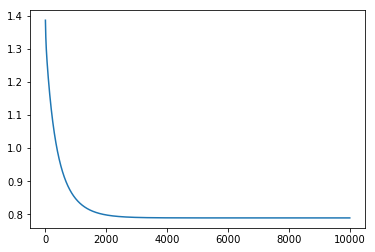

In [7]:
# loss curve visualization
log = np.array(log)
print(log)
plt.plot(log[:,0],log[:,1])

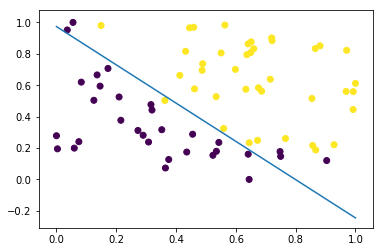

In [8]:
# visualization
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)


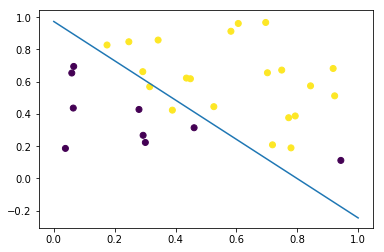

In [9]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)